In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from datetime import datetime
from pandas import read_csv
import add_data
%matplotlib inline

# Seeing Comparison

The plots below compare our circular buffer data for seeing to that of Mauna Kea Weather Service's reported data for the February run.  For each night, there is a pair of plots.  The top shows integrated seeing, and the bottom shows free atmosphere seeing.  In each case, the blue represents the reported seeing (top: DIMM, bottom: MASS) and the red represents our measurments.

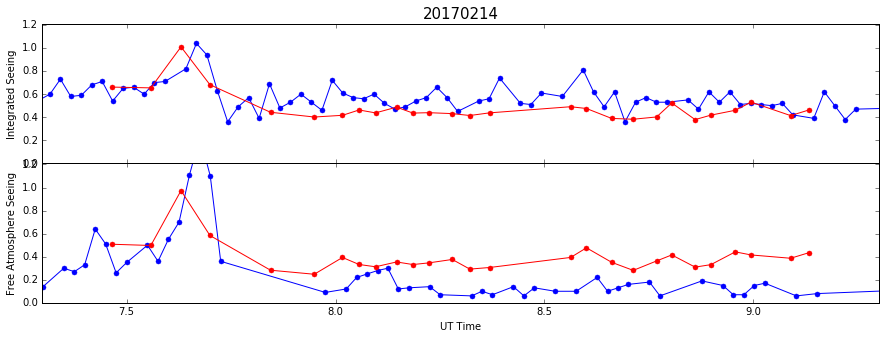

In [12]:
compare_seeing('20170214')

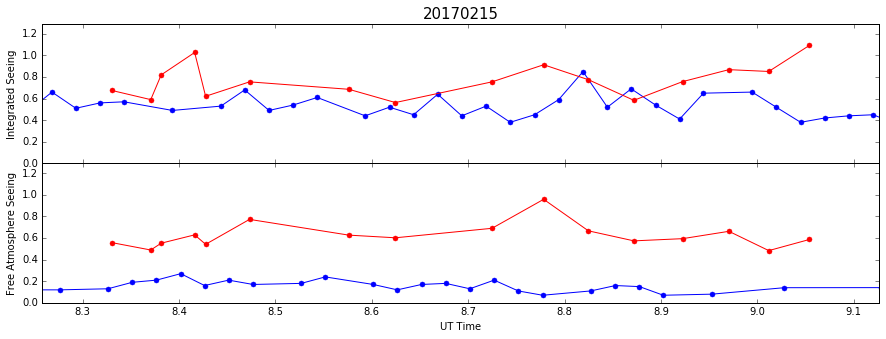

In [13]:
compare_seeing('20170215')

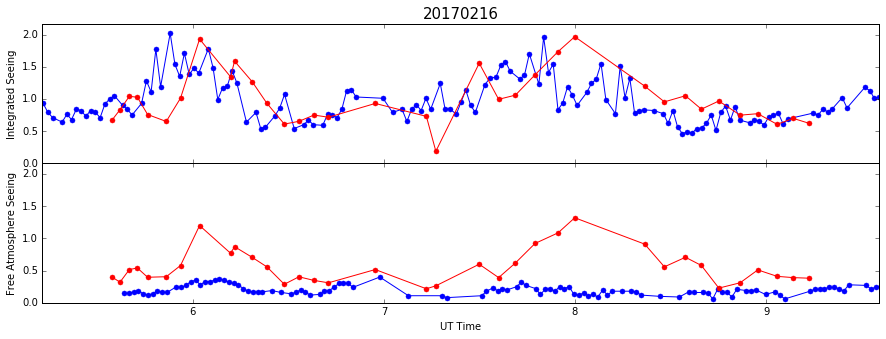

In [14]:
compare_seeing('20170216')

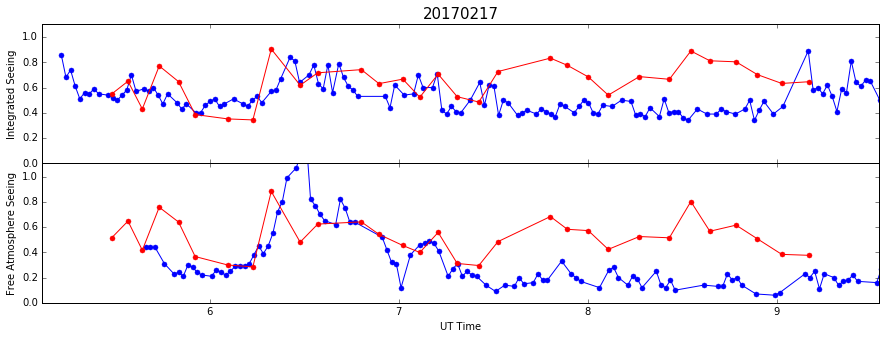

In [15]:
compare_seeing('20170217')

In [11]:
date='20170215'
def compare_seeing(date):
    stat_dir = "/Users/astrouser/Desktop/Research/imaka/RUN4/"+date+"/FLI/reduce/stats/"
    md_dir = "/Users/astrouser/Desktop/Research/imaka/RUN4/"+date+"/FLI/reduce/massdimm/"
    alt_file = stat_dir + "profile-data_"+date+"-noTT.fits"
    dimm_file = md_dir +date+".dimm.dat"
    mass_file = md_dir +date+".mass.dat"

    table = read_csv(dimm_file, delim_whitespace=True, names= \
                    ['year', 'month', 'day', 'hour', 'minute', 'second', 'seeing'])

    year  = np.array(table['year'])
    month = np.array(table['month'])
    day   = np.array(table['day'])
    hour   = np.array(table['hour'])
    minute = np.array(table['minute'])
    second = np.array(table['second'])
    dimm_seeing = np.array(table['seeing'])
    hour += 10
    idx = np.where(hour >=24)[0]
    day[idx] += 1
    hour[idx] -= 24
    timeInHours_dimm = hour + (minute/60.0) + (second/3600.0)


    table = read_csv(mass_file, delim_whitespace=True, names= \
                     ['year', 'month', 'day', 'hour', 'minute', 'second', 'seeing'])

    year  = np.array(table['year'])
    month = np.array(table['month'])
    day   = np.array(table['day'])
    hour   = np.array(table['hour'])
    minute = np.array(table['minute'])
    second = np.array(table['second'])
    mass_seeing = np.array(table['seeing'])
    hour += 10
    idx = np.where(hour >=24)[0]
    day[idx] += 1
    hour[idx] -= 24
    timeInHours_mass = hour + (minute/60.0) + (second/3600.0)

    data = fits.getdata(alt_file)

    f, (ax1, ax2) = plt.subplots(2, figsize=(15,5), sharex=True, sharey=True)
    ax1.plot(timeInHours_dimm, dimm_seeing, 'b.-', markersize=10, label='DIMM')
    ax1.plot(data[:,0], data[:,1], 'r.-', markersize=10, label='Our Data')
    ax1.axis(plt.axis([np.amin(data[:,0])-((np.amax(data[:,0]-np.amin(data[:,0])))*0.1), np.amax(data[:,0])+((np.amax(data[:,0]-np.amin(data[:,0])))*0.1),0, np.amax(data[:,1])+0.2]))
    ax1.set_title(date, fontsize=15)
    ax1.set_ylabel('Integrated Seeing')


    ax2.plot(timeInHours_mass, mass_seeing, 'b.-', markersize=10, label='MASS')
    ax2.plot(data[:,0], data[:,-1], 'r.-', markersize=10, label='Our Data')
    ax2.set_ylabel('Free Atmosphere Seeing')
    ax2.set_xlabel('UT Time')

    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
    return